In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


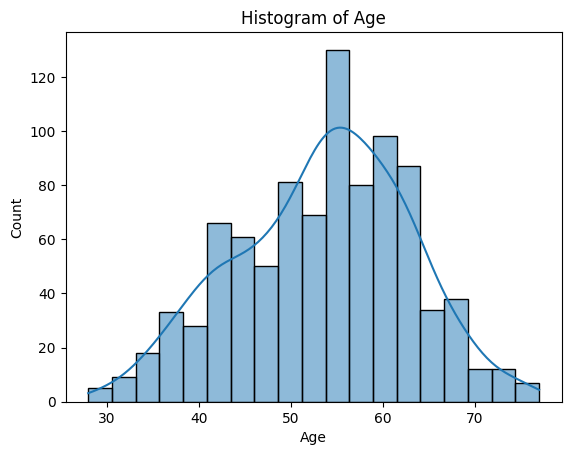

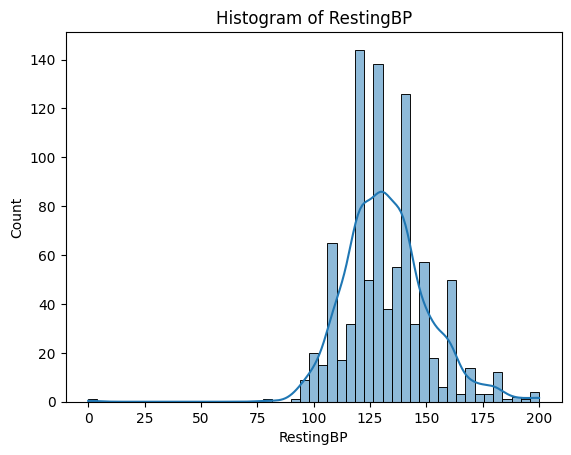

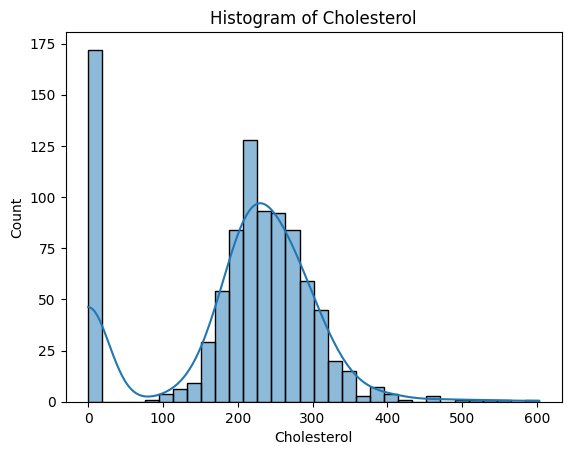

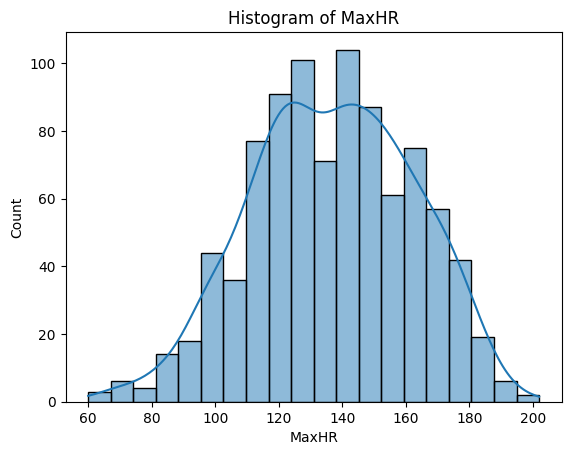

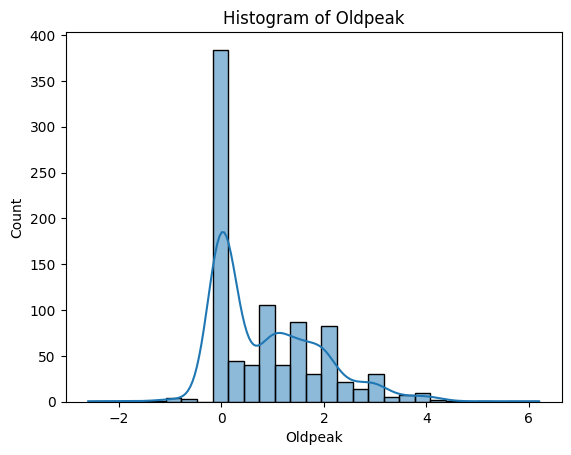

In [5]:
numerical_columns = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Plotting histograms
for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [6]:
# function to get z_score
def get_zscore(column):
    return (column - column.mean()) / column.std()

# Now lets create z score for the following columns
df['Age_zscore'] = get_zscore(df.Age)
df['RestingBP_zscore'] = get_zscore(df.RestingBP)
df['Cholesterol_zscore'] = get_zscore(df.Cholesterol)
df['MaxHR_zscore'] = get_zscore(df.MaxHR)
df['Oldpeak_zscore'] = get_zscore(df.Oldpeak)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,MaxHR_zscore,Oldpeak_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979


In [8]:
# lets remove outliers
def filter_zscores(df, columns):
    outlier_removal = (df[columns] > -3) & (df[columns] < 3)
    return df[outlier_removal.all(axis=1)]

columns_to_filter = ['Age_zscore', 'RestingBP_zscore', 'Cholesterol_zscore', 'MaxHR_zscore', 'Oldpeak_zscore']
df_filtered = filter_zscores(df, columns_to_filter)

df_filtered.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,MaxHR_zscore,Oldpeak_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979


In [9]:
df_filtered.shape

(899, 17)

In [10]:
df_filtered = df_filtered.drop(columns=['Age_zscore', 'RestingBP_zscore', 'Cholesterol_zscore', 'MaxHR_zscore', 'Oldpeak_zscore'])

df_filtered.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df_filtered.shape

(899, 12)

In [12]:
# Label Encoder for converting text columns
from sklearn.preprocessing import LabelEncoder

# function to transform text columns using Label encoder
def get_le(column):
    le = LabelEncoder()
    return le.fit_transform(column)

# function to apply text columns
def apply_col(df, columns):
    for column in columns:
        df[column] = get_le(df[column])
    return df

In [13]:
text_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope',]

df_filtered = apply_col(df_filtered, text_col)

df_filtered.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [14]:
for col in text_col:
    print(f"{df[col].unique()} -> {(df_filtered[col].unique())}")

['M' 'F'] -> [1 0]
['ATA' 'NAP' 'ASY' 'TA'] -> [1 2 0 3]
['Normal' 'ST' 'LVH'] -> [1 2 0]
['N' 'Y'] -> [0 1]
['Up' 'Flat' 'Down'] -> [2 1 0]


In [15]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
X = df_filtered.drop(df_filtered[['HeartDisease']], axis='columns')
y = df_filtered.HeartDisease

# y.head()
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [17]:
X_scale = scaler.fit_transform(X)

X_scale[0]

array([-1.42815446,  0.515943  ,  0.2245723 ,  0.46590022,  0.84963584,
       -0.5503622 ,  0.01414258,  1.38431998, -0.8229452 , -0.85546862,
        1.04249607])

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

vector = SVC()
dtree = DecisionTreeClassifier()

### SVM

In [21]:
score = cross_val_score(vector, X_scale, y, cv=5)

score

array([0.84444444, 0.86111111, 0.83888889, 0.82777778, 0.75977654])

In [22]:
score.mean()

0.8263997517070143

### Decision Tree

In [23]:
score2 = cross_val_score(dtree, X_scale, y, cv=5)

score2

array([0.76666667, 0.74444444, 0.78333333, 0.76666667, 0.63128492])

In [24]:
score2.mean()

0.7384792054624456

### Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)

score = cross_val_score(bag, X, y, cv=5)
score

array([0.63888889, 0.78888889, 0.68888889, 0.70555556, 0.61452514])

In [33]:
score.mean()

0.6873494723774053

In [34]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)

score2 = cross_val_score(bag, X, y, cv=5)
score2

array([0.89444444, 0.81111111, 0.82222222, 0.82222222, 0.72625698])

In [35]:
score2.mean()

0.8152513966480447

In summary, bagging works particularly well with models that are less stable like **Decision Tree Classifier**.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)

score3 = cross_val_score(rf, X, y, cv=5)
score3

array([0.85      , 0.81666667, 0.82777778, 0.84444444, 0.78212291])

In [37]:
score3.mean()

0.8242023587833645

Random forest gave even a better performance with **82.4%** as score. (it is also a ensemble method like bagging)